In [8]:
import numpy as np
import pandas as pd
from numpy import genfromtxt

import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (10, 6)

## Dataset 3

In [9]:
data3 = pd.read_csv('datasets/insurance_data.csv')
data3 = np.asarray(data3)

cols = ['FT1', 'FT2', 'FT3', 'FT4', 'FT5', 'FT6', 'Charges']
input_cols = ['FT1', 'FT2', 'FT3', 'FT4', 'FT5', 'FT6']

charges_idx = cols.index('Charges')

y_ = data3[:, charges_idx]

data3_copy = np.copy(data3)
data3_copy = np.delete(data3_copy, charges_idx, 1)

X_ = data3_copy

### Visualize the Data

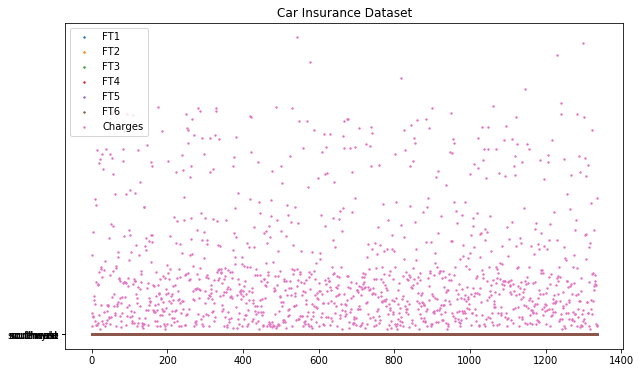

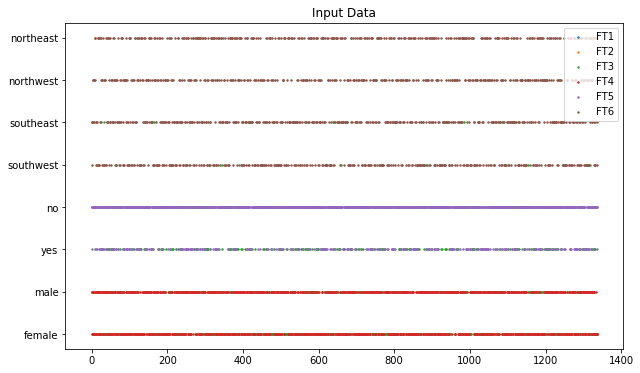

In [10]:
for idx, col in enumerate(cols):
    feature = data3[:, idx]
    plt.scatter(np.arange(len(feature)), feature, label=col,  s=2)
    
plt.title('Car Insurance Dataset')
plt.legend()
plt.show()

for idx, col in enumerate(input_cols):
    feature = X_[:, idx]
    plt.scatter(np.arange(len(feature)), feature, label=col,  s=2)
    
plt.title('Input Data')
plt.legend()
plt.show()

## Feature Preprocessing

### One-hot Encoding on Features ft4, ft5, and ft6

In [11]:
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder()

onehot_enc = OneHotEncoder()
data3_to_onehot_enc = data3[:, 3:6] # One-hot encode features ft4, ft5,and ft6
data3_onehot_encoded = onehot_enc.fit_transform(data3_to_onehot_enc).toarray()

X_onehot_encoded = np.copy(X_)
print(X_onehot_encoded[0:5,:])
print(np.shape(X_onehot_encoded))
X_onehot_encoded = np.delete(X_onehot_encoded, np.s_[3:6], axis=1)
print(X_onehot_encoded[0:5,:])
print(np.shape(X_onehot_encoded))

X_onehot_encoded = np.concatenate((X_onehot_encoded, data3_onehot_encoded), axis=1)

print(X_onehot_encoded[0:5,:])
print(np.shape(X_onehot_encoded))

[[19 27.9 0 'female' 'yes' 'southwest']
 [18 33.77 1 'male' 'no' 'southeast']
 [28 33.0 3 'male' 'no' 'southeast']
 [33 22.705 0 'male' 'no' 'northwest']
 [32 28.88 0 'male' 'no' 'northwest']]
(1338, 6)
[[19 27.9 0]
 [18 33.77 1]
 [28 33.0 3]
 [33 22.705 0]
 [32 28.88 0]]
(1338, 3)
[[19 27.9 0 1.0 0.0 0.0 1.0 0.0 0.0 0.0 1.0]
 [18 33.77 1 0.0 1.0 1.0 0.0 0.0 0.0 1.0 0.0]
 [28 33.0 3 0.0 1.0 1.0 0.0 0.0 0.0 1.0 0.0]
 [33 22.705 0 0.0 1.0 1.0 0.0 0.0 1.0 0.0 0.0]
 [32 28.88 0 0.0 1.0 1.0 0.0 0.0 1.0 0.0 0.0]]
(1338, 11)


### Linear Regression, One-hot Encoding

In [12]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

def rmse(y_1, y_2):
    return np.sqrt(mean_squared_error(y_1, y_2))

In [13]:
# TODO

### Standardization on numerical features (ft 1, ft2, ft3)

In [14]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

data3_to_scale = data3[:, 0:3] # Standardize features ft1, ft2,and ft3
data3_standardized = scaler.fit_transform(data3_to_scale)

# print(data3_standardized)

X_scaled_onehot_encoded = np.copy(X_onehot_encoded)
print(X_scaled_onehot_encoded[0:5,:])
print(np.shape(X_scaled_onehot_encoded))
X_scaled_onehot_encoded = np.delete(X_scaled_onehot_encoded, np.s_[0:3], axis=1)
print(X_scaled_onehot_encoded[0:5,:])
print(np.shape(X_scaled_onehot_encoded))
X_scaled_onehot_encoded = np.concatenate((data3_standardized, X_scaled_onehot_encoded), axis=1)

print(X_scaled_onehot_encoded[0:5,:])
print(np.shape(X_scaled_onehot_encoded))

[[19 27.9 0 1.0 0.0 0.0 1.0 0.0 0.0 0.0 1.0]
 [18 33.77 1 0.0 1.0 1.0 0.0 0.0 0.0 1.0 0.0]
 [28 33.0 3 0.0 1.0 1.0 0.0 0.0 0.0 1.0 0.0]
 [33 22.705 0 0.0 1.0 1.0 0.0 0.0 1.0 0.0 0.0]
 [32 28.88 0 0.0 1.0 1.0 0.0 0.0 1.0 0.0 0.0]]
(1338, 11)
[[1.0 0.0 0.0 1.0 0.0 0.0 0.0 1.0]
 [0.0 1.0 1.0 0.0 0.0 0.0 1.0 0.0]
 [0.0 1.0 1.0 0.0 0.0 0.0 1.0 0.0]
 [0.0 1.0 1.0 0.0 0.0 1.0 0.0 0.0]
 [0.0 1.0 1.0 0.0 0.0 1.0 0.0 0.0]]
(1338, 8)
[[-1.4387642602644821 -0.45332000146019785 -0.9086136674186784 1.0 0.0
  0.0 1.0 0.0 0.0 0.0 1.0]
 [-1.5099654504939408 0.5096210969173165 -0.07876719164653397 0.0 1.0 1.0
  0.0 0.0 0.0 1.0 0.0]
 [-0.7979535481993532 0.38330684721532526 1.580925759897755 0.0 1.0 1.0
  0.0 0.0 0.0 1.0 0.0]
 [-0.44194759705205927 -1.305531075748304 -0.9086136674186784 0.0 1.0 1.0
  0.0 0.0 1.0 0.0 0.0]
 [-0.513148787281518 -0.2925564109303915 -0.9086136674186784 0.0 1.0 1.0
  0.0 0.0 1.0 0.0 0.0]]
(1338, 11)


/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


### Linear Regression, Standardization

In [15]:
# TODO

### Feature Division

In [16]:
data3 = pd.read_csv('datasets/insurance_data.csv')
data3 = np.asarray(data3)

data3_division = data3[:,0]


for i in range(len(data3_division)):
    if data3[i,0] < 30:
        data3_division[i] = 1
    elif data3[i,0] > 50:
        data3_division[i] = 3
    else:
        data3_division[i] = 2

data3_division = data3_division[:, np.newaxis]        
print(data3_division[1:10, 0])
print(np.shape(data3_division))

X_division_scaled_onehot_encoded = np.copy(X_scaled_onehot_encoded)
print(X_division_scaled_onehot_encoded[0:5,:])
print(np.shape(X_division_scaled_onehot_encoded))
X_division_scaled_onehot_encoded = np.delete(X_division_scaled_onehot_encoded, 0, axis=1)
print(X_division_scaled_onehot_encoded[0:5,:])
print(np.shape(X_division_scaled_onehot_encoded))
X_division_scaled_onehot_encoded = np.concatenate((data3_division, X_division_scaled_onehot_encoded), axis=1)

print(X_division_scaled_onehot_encoded[0:5,:])
print(np.shape(X_division_scaled_onehot_encoded))

[1 1 2 2 2 2 2 2 3]
(1338, 1)
[[-1.4387642602644821 -0.45332000146019785 -0.9086136674186784 1.0 0.0
  0.0 1.0 0.0 0.0 0.0 1.0]
 [-1.5099654504939408 0.5096210969173165 -0.07876719164653397 0.0 1.0 1.0
  0.0 0.0 0.0 1.0 0.0]
 [-0.7979535481993532 0.38330684721532526 1.580925759897755 0.0 1.0 1.0
  0.0 0.0 0.0 1.0 0.0]
 [-0.44194759705205927 -1.305531075748304 -0.9086136674186784 0.0 1.0 1.0
  0.0 0.0 1.0 0.0 0.0]
 [-0.513148787281518 -0.2925564109303915 -0.9086136674186784 0.0 1.0 1.0
  0.0 0.0 1.0 0.0 0.0]]
(1338, 11)
[[-0.45332000146019785 -0.9086136674186784 1.0 0.0 0.0 1.0 0.0 0.0 0.0
  1.0]
 [0.5096210969173165 -0.07876719164653397 0.0 1.0 1.0 0.0 0.0 0.0 1.0 0.0]
 [0.38330684721532526 1.580925759897755 0.0 1.0 1.0 0.0 0.0 0.0 1.0 0.0]
 [-1.305531075748304 -0.9086136674186784 0.0 1.0 1.0 0.0 0.0 1.0 0.0 0.0]
 [-0.2925564109303915 -0.9086136674186784 0.0 1.0 1.0 0.0 0.0 1.0 0.0 0.0]]
(1338, 10)
[[1 -0.45332000146019785 -0.9086136674186784 1.0 0.0 0.0 1.0 0.0 0.0 0.0
  1.0]
 [1 0.50

### Linear Regression, Feature Division

In [17]:
# TODO 

In [18]:
import os
os.system("say 'I am done with this program. Let's go team!") 

0